In [1]:
# 주피터 노트북에서 경고메시지 안나오게 설정
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
import pandas as pd
import numpy as np
np.random.seed(42)
df = pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/moons.csv')
df

,X1,X2,Y
0,0.997072,-0.764072,1
1,-0.040078,-0.349546,1
2,0.818753,0.829183,0
3,1.211097,-0.471013,1
4,0.933354,-0.200320,1
...,...,...,...
295,1.533223,-0.131914,1
296,-0.180141,-0.183182,1
297,-0.549083,0.126187,0
298,0.682335,1.345413,0


<AxesSubplot: xlabel='X1', ylabel='X2'>

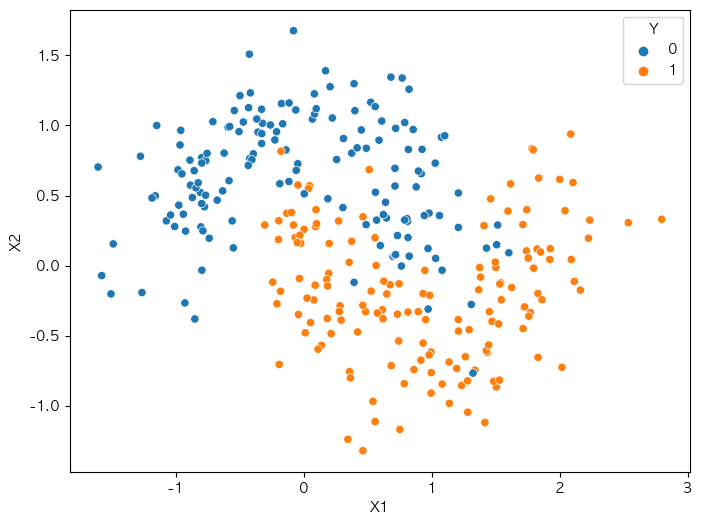

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='X1',y='X2',hue='Y',data=df)

In [21]:
## 독립 종속변수 나누기
X = df[['X1','X2']]
y = df['Y']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True) # 7:3 분할 (훈련:테스트, 무작위)

<AxesSubplot: xlabel='X1', ylabel='X2'>

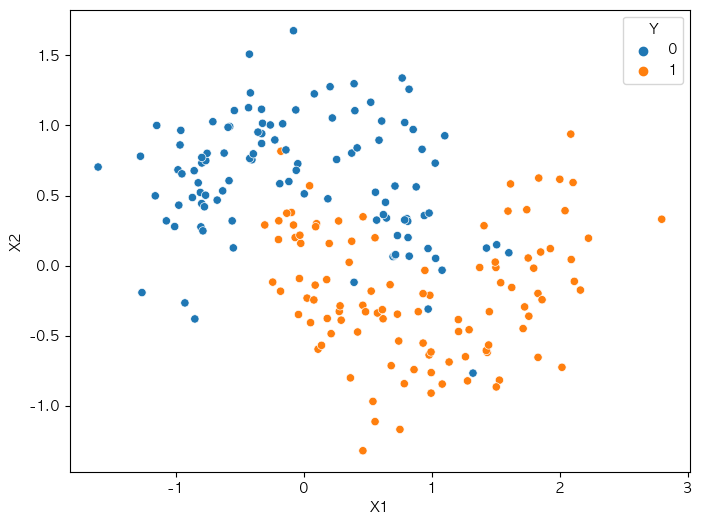

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train['X1'],y=X_train['X2'], hue=y_train)

### 로지스틱회귀

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score


def plot_classifier(degree, graph=True):
    
    ## 모델 생성
    clf = LogisticRegression()    
    
    ## 데이터 변환
    poly = PolynomialFeatures(degree=degree,include_bias=False)    
    X_train_ = poly.fit_transform(X_train)
        
    # 모델학습
    clf.fit(X_train_, y_train)    
    y_pred_train = clf.predict(X_train_)
    
    ## 그래프 그리기 (몰라도 됨)
    if graph:
        x1_grid, x2_grid = np.meshgrid(np.arange(-2, 3, 0.01), np.arange(-1.5, 2, 0.01))
        X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
        X_bound_ = poly.fit_transform(X_bound)
        y_bound=clf.predict(X_bound_)
        y_bound=y_bound.reshape(x1_grid.shape)
    
        # Create a contour plot with colored contours based on the density of the 'X1' and 'X2' columns    
        sns.scatterplot(X_test['X1'], X_test['X2'], hue=y_test)
        plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3) # 의사결정 경계선 그리는 함수

    # Show the plot
    plt.show()
    
    # 분류지표 계산
    X_test_ = poly.fit_transform(X_test)
    y_pred_test = clf.predict(X_test_)
    train_acc = accuracy_score(y_train, y_pred_train) # 훈련 데이터에 대한 분류 정확도
    test_acc = accuracy_score(y_test,y_pred_test) # 테스팅 데이터에 대한 분류 정확도
    print(f'training ACC: {train_acc}')
    print(f'testing ACC:{test_acc}')
    
    
    return train_acc, test_acc

### 1차 로지스틱회귀

In [25]:
plot_classifier(2)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

==========1==========
training ACC: 0.819047619047619
testing ACC:0.8444444444444444
==========2==========
training ACC: 0.8142857142857143
testing ACC:0.8444444444444444
==========3==========
training ACC: 0.9142857142857143
testing ACC:0.9
==========4==========
training ACC: 0.9285714285714286
testing ACC:0.9111111111111111
==========5==========
training ACC: 0.9333333333333333
testing ACC:0.9111111111111111
==========6==========
training ACC: 0.9333333333333333
testing ACC:0.9111111111111111
==========7==========
training ACC: 0.9285714285714286
testing ACC:0.9111111111111111
==========8==========
training ACC: 0.9285714285714286
testing ACC:0.9111111111111111
==========9==========
training ACC: 0.9333333333333333
testing ACC:0.9111111111111111
==========10==========
training ACC: 0.9428571428571428
testing ACC:0.9111111111111111
==========11==========
training ACC: 0.9428571428571428
testing ACC:0.9111111111111111
==========12==========
training ACC: 0.9095238095238095
testing ACC:

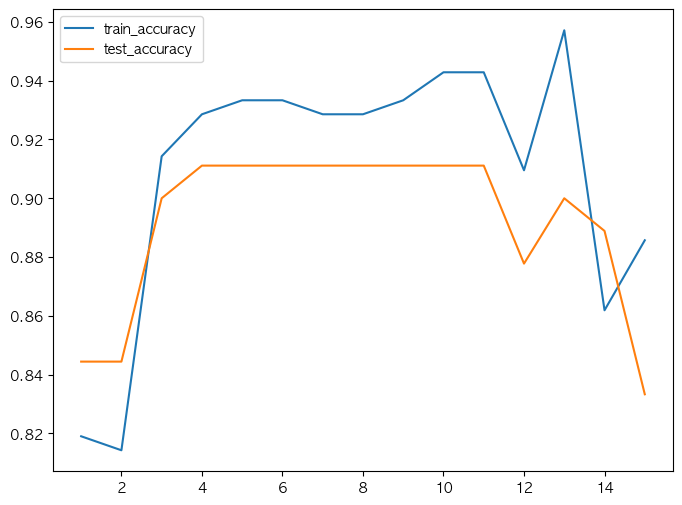

In [26]:
train_acc = []
test_acc = []
degrees = range(1,16)

for i in degrees:
    print("="*10+str(i)+"="*10)
    train, test = plot_classifier(i,graph=False)
    train_acc.append(train)
    test_acc.append(test)

plt.figure(figsize=(8,6))
plt.plot(degrees,train_acc, label = 'train_accuracy')
plt.plot(degrees,test_acc, label = 'test_accuracy')
plt.legend()